In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.applications.resnet import ResNet50
from keras.applications.xception import Xception
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

In [2]:
batch_size = 256
epochs = 5
target_size = (256, 256)
folder_name = "amanneo"
directory = f"../Datasets/{folder_name}/Splitted_Dataset_2"

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=50,
    horizontal_flip=True,
    vertical_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    directory=f"{directory}/train",
    batch_size=batch_size,
    class_mode='categorical',
    target_size=target_size,
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{directory}/test",
    batch_size=batch_size,
    class_mode="categorical",
    target_size=target_size,
)

validation_generator = validation_datagen.flow_from_directory(
    directory=f"{directory}/val",
    batch_size=batch_size,
    class_mode="categorical",
    target_size=target_size,
)

Found 21073 images belonging to 5 classes.
Found 7030 images belonging to 5 classes.
Found 7023 images belonging to 5 classes.


# DenseNet Model

In [3]:
DenseNetBase = DenseNet121(weights='imagenet', include_top=False, input_shape=(256,256,3), classifier_activation='softmax')

layer = DenseNetBase.output
layer = GlobalAveragePooling2D()(layer)

layer = Dense(1024, activation='relu', kernel_initializer='he_normal')(layer)

DenseNetPreds = Dense(5, activation='softmax')(layer)

DenseNetModel = Model(inputs=DenseNetBase.input, outputs=DenseNetPreds)

print(f"Toplam DenseNet katman sayısı: {len(DenseNetModel.layers)}")

Toplam DenseNet katman sayısı: 430


In [4]:
for layer in DenseNetBase.layers:
    layer.trainable = False

for layer in DenseNetBase.layers[-100:]:
    layer.trainable = True

DenseNetModel.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
DenseNetModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [5]:
DenseNetHistory = DenseNetModel.fit(
    x=train_generator, validation_data=validation_generator, epochs=epochs
)

Epoch 1/5
165/165 [==============================] - 203s 1s/step - loss: 1.2037 - accuracy: 0.6237 - val_loss: 1.0375 - val_accuracy: 0.7195
Epoch 2/5
165/165 [==============================] - 186s 1s/step - loss: 0.9547 - accuracy: 0.7318 - val_loss: 0.9170 - val_accuracy: 0.7336
Epoch 3/5
165/165 [==============================] - 190s 1s/step - loss: 0.8990 - accuracy: 0.7329 - val_loss: 0.8895 - val_accuracy: 0.7337
Epoch 4/5
165/165 [==============================] - 189s 1s/step - loss: 0.8755 - accuracy: 0.7335 - val_loss: 0.8774 - val_accuracy: 0.7332
Epoch 5/5
 95/165 [================>.............] - ETA: 1:14 - loss: 0.8635 - accuracy: 0.7362

KeyboardInterrupt: 

In [6]:
DenseNetModel.evaluate(test_generator)

55/55 [==============================] - 18s 323ms/step - loss: 0.8633 - accuracy: 0.7326


[0.8633306622505188, 0.7325747013092041]

# ResNet

In [ ]:
ResNetBase = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3), classifier_activation='softmax')

layer2 = ResNetBase.output

layer2 = GlobalAveragePooling2D()(layer2)

layer2 = Dense(1024, activation='relu')(layer2)

ResNetPreds = Dense(5, activation='softmax')(layer2)

ResNetModel = Model(inputs=ResNetBase.input, outputs=ResNetPreds)

print(f"Toplam ResNet katman sayısı: {len(ResNetModel.layers)}")

In [ ]:
for layer in ResNetBase.layers:
    layer.trainable = False

for layer in ResNetBase.layers[-10:]:
    layer.trainable = True

ResNetModel.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

ResNetModel.summary()

In [ ]:
ResNetHistory = ResNetModel.fit(
    x=train_generator, validation_data=validation_generator, epochs=epochs
)

In [ ]:
ResNetModel.evaluate(test_generator)

NameError: name 'DenseNetHistory' is not defined

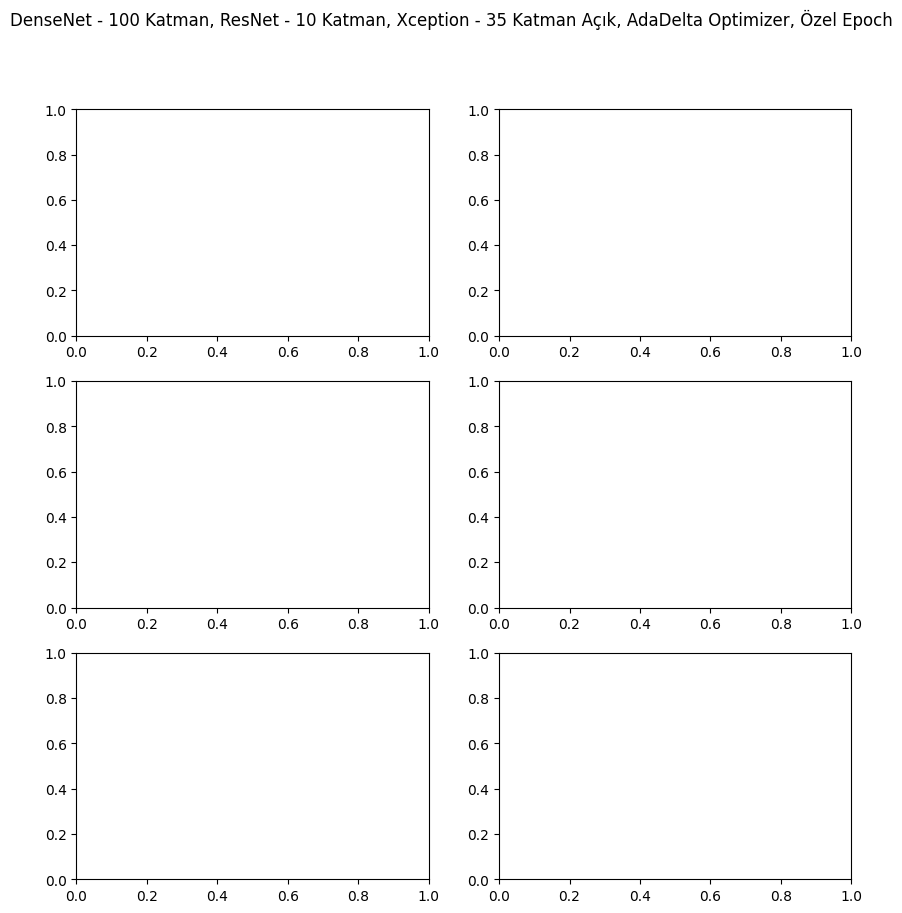

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

plt.suptitle("DenseNet - 100 Katman, ResNet - 10 Katman, Xception - 35 Katman Açık, AdaDelta Optimizer, Özel Epoch")

axs[0, 0].plot(DenseNetHistory.history['accuracy'], label='DenseNet Training Accuracy')
axs[0, 0].set_title('Training Accuracy')
axs[0, 0].legend()
axs[0, 0].plot(DenseNetHistory.history['val_accuracy'], label='DenseNet Validation Accuracy')
axs[0, 0].set_title('Validation Accuracy')
axs[0, 0].legend()

axs[0, 1].plot(DenseNetHistory.history['loss'], label='DenseNet Training Loss')
axs[0, 1].set_title('Training Loss')
axs[0, 1].legend()
axs[0, 1].plot(DenseNetHistory.history['val_loss'], label='DenseNet Validation Loss')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].legend()

axs[1, 0].plot(ResNetHistory.history['accuracy'], label='ResNet Training Accuracy')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].legend()
axs[1, 0].plot(ResNetHistory.history['val_accuracy'], label='ResNet Validation Accuracy')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 0].legend()

axs[1, 1].plot(ResNetHistory.history['loss'], label='ResNet Training Loss')
axs[1, 1].set_title('Training Loss')
axs[1, 1].legend()
axs[1, 1].plot(ResNetHistory.history['val_loss'], label='ResNet Validation Loss')
axs[1, 1].set_title('Validation Loss')
axs[1, 1].legend()

plt.tight_layout()
plt.show()